In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
from tqdm import tqdm
import curvedsky as cs


In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from quest import Reconstruction

In [4]:
sim0 = SimExperimentFG.from_ini('../LB_FG0.ini')
sim1 = SimExperimentFG.from_ini('../LB_FG1.ini')
sim2 = SimExperimentFG.from_ini('../LB_FG2.ini')

/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/noFG
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s0d0
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s1d1


In [5]:
rec0 = Reconstruction.from_ini('../LB_FG0.ini')
rec1 = Reconstruction.from_ini('../LB_FG1.ini')
rec2 = Reconstruction.from_ini('../LB_FG2.ini')

/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/noFG
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s0d0
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s1d1


In [6]:


def get_mean(sim,no):
    
    Clee, Clbb = [],[]
    for i in tqdm(range(no),desc='Getting mean',unit='simul'):
        alms = sim.get_cleaned_cmb(i)
        Clee.append(hp.alm2cl(alms[1]))
        Clbb.append(hp.alm2cl(alms[2]))
    Clee = np.array(Clee)
    Clbb = np.array(Clbb)
    return Clee.mean(axis=0),Clee.std(axis=0),Clbb.mean(axis=0),Clbb.std(axis=0)

    

In [7]:
clm_fg0_ee,cls_fg0_ee,clm_fg0_bb,cls_fg0_ee = get_mean(sim0,100)

Getting mean: 100%|██████████| 100/100 [00:41<00:00,  2.39simul/s]


In [8]:
clm_fg1_ee,cls_fg1_ee,clm_fg1_bb,cls_fg1_ee = get_mean(sim1,100)

Getting mean: 100%|██████████| 100/100 [00:43<00:00,  2.30simul/s]


In [9]:
clm_fg2_ee,cls_fg2_ee,clm_fg2_bb,cls_fg2_ee = get_mean(sim2,100)

Getting mean: 100%|██████████| 100/100 [00:47<00:00,  2.09simul/s]


Text(0, 0.5, '$C_\\ell$ [$\\mu$K$^2$]')

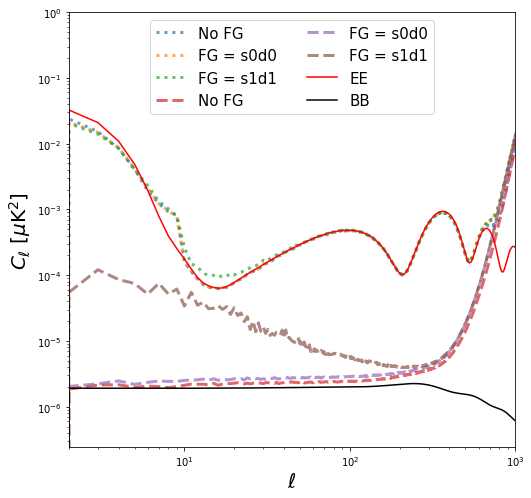

In [10]:

plt.figure(figsize=(8,8))
plt.loglog(clm_fg0_ee,alpha=.7,ls=':',lw=3,label='No FG')
plt.loglog(clm_fg1_ee,alpha=.7,ls=':',lw=3,label='FG = s0d0')
plt.loglog(clm_fg2_ee,alpha=.7,ls=':',lw=3,label='FG = s1d1')
plt.loglog(clm_fg0_bb,alpha=.7,ls='--',lw=3,label='No FG')
plt.loglog(clm_fg1_bb,alpha=.7,ls='--',lw=3,label='FG = s0d0')
plt.loglog(clm_fg2_bb,alpha=.7,ls='--',lw=3,label='FG = s1d1')
plt.loglog(rec0.cl_len[1,:]*rec0.Tcmb**2,label='EE',c='r')
plt.loglog(rec0.cl_len[2,:]*rec0.Tcmb**2,label='BB',c='k')
plt.legend(fontsize=15,loc='upper center',ncol=2)
plt.xlim(2,1000)
plt.ylim(None,1)
plt.xlabel('$\ell$',fontsize=20)
plt.ylabel('$C_\ell$ [$\mu$K$^2$]',fontsize=20)

corss spectra stat: 100%|██████████| 400/400 [00:39<00:00, 10.24simulation/s]
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:215: RuntimeWarning: invalid value encountered in true_divide
  fl = self.cl_pp/(self.cl_pp+ nhl )


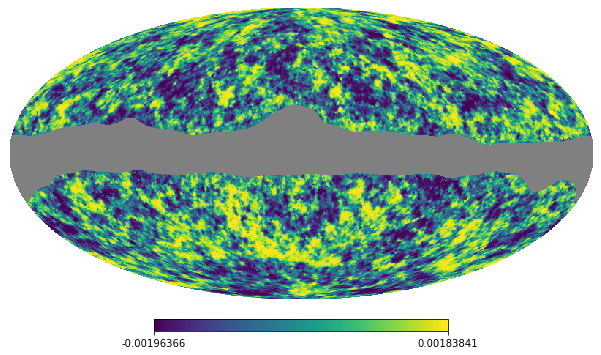

In [11]:
km = cs.utils.hp_alm2map(rec2.nside, rec2.Lmax,rec2.Lmax,rec2.deflection_angle(0))
km_masked =hp.ma(km)
km_masked.mask = np.logical_not(rec0.mask)
hp.mollview(km_masked.filled(),title='',norm='hist')

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:388: RuntimeWarning: invalid value encountered in true_divide
  return arr
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:388: RuntimeWarning: invalid value encountered in true_divide
  return arr
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:388: RuntimeWarning: invalid value encountered in true_divide
  return arr


Text(0.5, 0, '$L$')

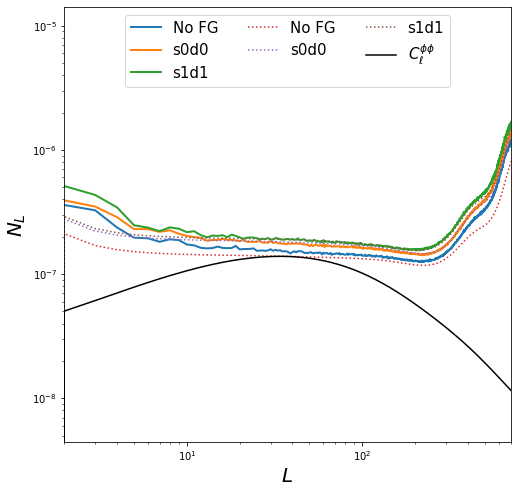

In [20]:
plt.figure(figsize=(8,8))
plt.loglog(rec0.MCN0() *rec0.Lfac,lw=2,label='No FG')
plt.loglog(rec1.MCN0() *rec0.Lfac,lw=2,label='s0d0')
plt.loglog(rec2.MCN0() *rec0.Lfac,lw=2,label='s1d1')


plt.loglog((rec0.norm) *rec0.Lfac,ls=':',label='No FG')
plt.loglog(rec1.norm*rec0.Lfac,ls=':',label='s0d0')
plt.loglog(rec2.norm*rec0.Lfac,ls=':',label='s1d1')
plt.loglog(rec0.cl_pp*rec0.Lfac,label='$C_\ell^{\phi \phi}$',c='k')
plt.legend(fontsize=15,loc='upper center',ncol=3)
plt.xlim(2,700)
plt.ylabel('$N_L$',fontsize=20)
plt.xlabel('$L$',fontsize=20)


Text(0.5, 0, '$L$')

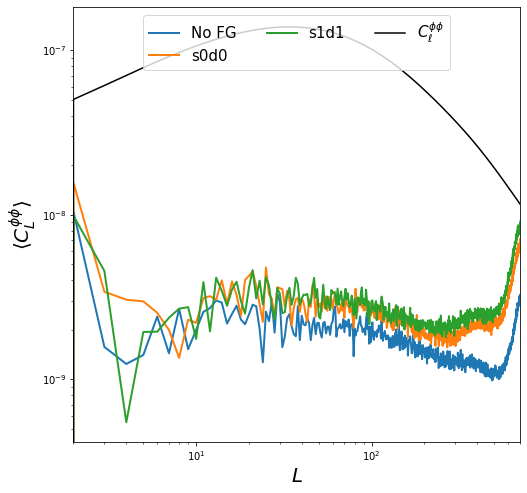

In [13]:

plt.figure(figsize=(8,8))
plt.loglog(rec0.mean_field_cl()*rec0.Lfac,lw=2,label='No FG')
plt.loglog(rec1.mean_field_cl()*rec0.Lfac,lw=2,label='s0d0')
plt.loglog(rec2.mean_field_cl()*rec0.Lfac,lw=2,label='s1d1')

plt.loglog(rec0.cl_pp*rec0.Lfac,label='$C_\ell^{\phi \phi}$',c='k')
plt.legend(fontsize=15,loc='upper center',ncol=3)
plt.xlim(2,700)
plt.ylabel('$\langle C_L^{\phi \phi} \\rangle $',fontsize=20)
plt.xlabel('$L$',fontsize=20)

In [14]:
tp0 = rec0.tXphi_stat(500)
tp1 = rec1.tXphi_stat(500)
tp2 = rec2.tXphi_stat(500)

TypeError: object supporting the buffer API required

Text(0, 0.5, '$C_\\ell^{T \\phi}$')

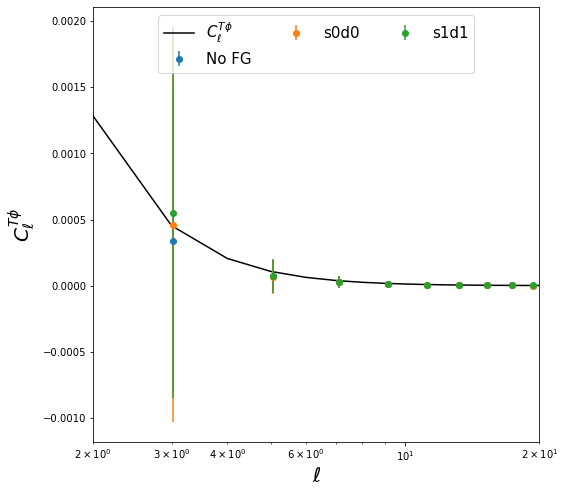

In [ ]:

plt.figure(figsize=(8,8))
plt.plot(rec0.cl_unl['tp'],label='$C_\ell^{T \phi}$',c='k')
plt.errorbar(rec0.Btp,tp0.mean(axis=0),yerr=tp0.std(axis=0),label='No FG',fmt='o')
plt.errorbar(rec0.Btp,tp1.mean(axis=0),yerr=tp1.std(axis=0),label='s0d0',fmt='o')
plt.errorbar(rec0.Btp,tp2.mean(axis=0),yerr=tp2.std(axis=0),label='s1d1',fmt='o')
#plt.semilogy()
plt.semilogx()
plt.xlim(2,20)
plt.legend(fontsize=15,loc='upper center',ncol=3)
plt.xlabel('$\ell$',fontsize=20)
plt.ylabel('$C_\ell^{T \phi}$',fontsize=20)

In [15]:
rec0.SNR_tp(500)

TypeError: object supporting the buffer API required

In [24]:
pp0 = rec0.get_qcl_wR_stat()
pp1 = rec1.get_qcl_wR_stat()
pp2 = rec2.get_qcl_wR_stat()

qcl stat:   0%|          | 0/400 [00:00<?, ?simulation/s]/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:351: RuntimeWarning: invalid value encountered in true_divide
  return self.get_qcl(idx)/self.response_mean()**2
qcl stat: 100%|██████████| 400/400 [00:26<00:00, 14.84simulation/s]


Text(0, 0.5, '$C_L^{\\phi \\phi}$')

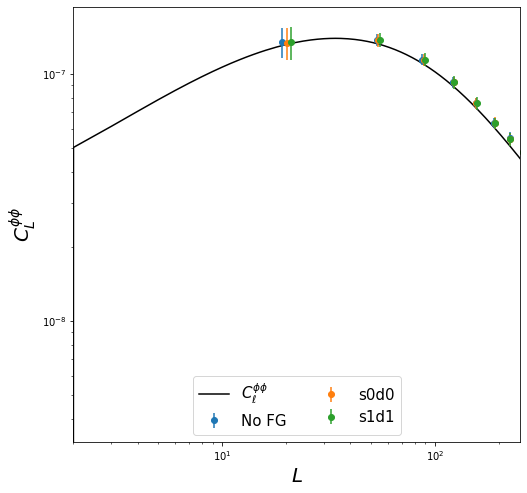

In [25]:
plt.figure(figsize=(8,8))
plt.loglog(rec0.L,rec0.cl_pp*rec0.Lfac,label='$C_\ell^{\phi \phi}$',c='k')
plt.errorbar(rec0.B, pp0.mean(axis=0),yerr=pp0.std(axis=0),label='No FG', fmt='o')
plt.errorbar(rec0.B+1, pp1.mean(axis=0),yerr=pp1.std(axis=0),label='s0d0', fmt='o')
plt.errorbar(rec0.B+2, pp2.mean(axis=0),yerr=pp2.std(axis=0),label='s1d1', fmt='o')
plt.xlim(2,250)
plt.legend(fontsize=15,loc='lower center',ncol=2)
plt.xlabel('$L$',fontsize=20)
plt.ylabel('$C_L^{\phi \phi}$',fontsize=20)

In [ ]:
nt0,ne0,nb0 = sim0.noise_spectra(500)
nt1,ne1,nb1 = sim1.noise_spectra(500)
nt2,ne2,nb2 = sim2.noise_spectra(500)

Text(0, 0.5, '$N_\\ell$ [$\\mu$K$^2$]')

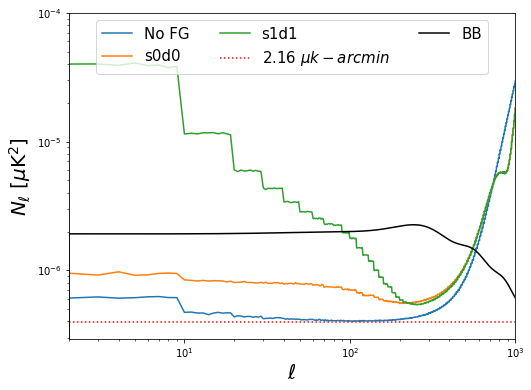

In [ ]:

plt.figure(figsize=(8,6))
plt.loglog(nb0,label='No FG')
plt.loglog(nb1,label='s0d0')
plt.loglog(nb2,label='s1d1')
plt.axhline(np.radians(2.16/60)**2,ls=":",c='r',label='2.16 $\mu k - arcmin$')
plt.loglog(rec0.cl_len[2,:]*rec0.Tcmb**2,label='BB',c='k')
plt.legend(fontsize=15,loc='upper center',ncol=3)
plt.xlim(2,1000)
plt.ylim(None,10**-4)
plt.xlabel('$\ell$',fontsize=20)
plt.ylabel('$N_\ell$ [$\mu$K$^2$]',fontsize=20)

In [16]:
rec0.SNR_phi()

qcl stat: 100%|██████████| 400/400 [00:48<00:00,  8.20simulation/s]


39.31752459006397

In [17]:
rec1.SNR_phi()

qcl stat: 100%|██████████| 400/400 [01:00<00:00,  6.60simulation/s]


36.600388762698536

In [18]:
rec2.SNR_phi()

qcl stat: 100%|██████████| 400/400 [01:00<00:00,  6.56simulation/s]


34.20616297811645